In [3]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.client import device_lib
print(tf.__version__)
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()


1.2.0


[]

In [4]:
sess = tf.InteractiveSession()

# Task 2

Extracting ../../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/t10k-labels-idx1-ubyte.gz
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']
(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)
Tensor("Const:0", shape=(784,), dtype=float32)
Tensor("Reshape:0", shape=(28, 28), dtype=float32)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


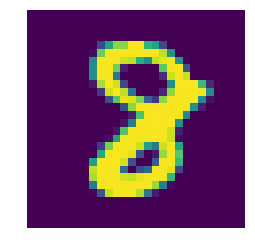

In [5]:

# Step 1: read in data from the .xls file
mnist = input_data.read_data_sets("../../data/MNIST_data/", one_hot=True)

_, input_dim = mnist.train.images.shape
_, output_dim = mnist.train.labels.shape

print(dir(mnist.train))
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

n_train, _ = mnist.train.images.shape
some_index = np.random.randint(1,n_train)
some_digit = tf.constant(mnist.train.images[some_index])
print(some_digit)
some_digit_image = tf.reshape(some_digit, [28,28])
print(some_digit_image)

print((mnist.train.labels[some_index]))
plt.imshow(some_digit_image.eval())
plt.axis("off")
plt.show()

Extracting ../../data/notMNIST-to-MNIST/data/train-images-idx3-ubyte.gz
Extracting ../../data/notMNIST-to-MNIST/data/train-labels-idx1-ubyte.gz
Extracting ../../data/notMNIST-to-MNIST/data/t10k-images-idx3-ubyte.gz
Extracting ../../data/notMNIST-to-MNIST/data/t10k-labels-idx1-ubyte.gz
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']
(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)
Tensor("Const_1:0", shape=(784,), dtype=float32)
Tensor("Reshape_1:0", shape=(28, 28), dtype=float32)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


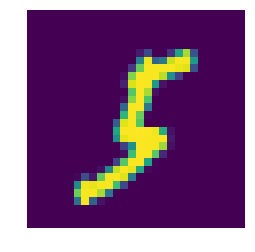

In [6]:
not_mnist = input_data.read_data_sets("../../data/notMNIST-to-MNIST/data", one_hot=True)

_, input_dim = not_mnist.train.images.shape
_, output_dim = not_mnist.train.labels.shape

print(dir(not_mnist.train))
print(not_mnist.train.images.shape)
print(not_mnist.train.labels.shape)
print(not_mnist.validation.images.shape)
print(not_mnist.validation.labels.shape)
print(not_mnist.test.images.shape)
print(not_mnist.test.labels.shape)

n_train, _ = not_mnist.train.images.shape
some_index = np.random.randint(1,n_train)
some_alpha = tf.constant(not_mnist.train.images[some_index])
print(some_alpha)
some_alpha_image = tf.reshape(some_alpha, [28,28])
print(some_alpha_image)

print((not_mnist.train.labels[some_index]))
plt.imshow(some_alpha_image.eval())
plt.axis("off")
plt.show()


In [7]:
# Step 2: create placeholders for input X (Image) and label Y (number)
X = tf.placeholder(tf.float32, shape=[None, input_dim], name="X")
Y = tf.placeholder(tf.float32, shape=[None,output_dim], name="Y")

# Logistic Regression

In [8]:
batch_size = 100
epochs = 1000
learning_rate=0.5

In [9]:

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(tf.truncated_normal([input_dim, output_dim]), name="weights")
b = tf.Variable(tf.truncated_normal([output_dim]), name="bias")

# Step 4: logistic multinomial regression / softmax
score = tf.matmul(X, w) + b

# Step 5: define loss function
loss = tf.nn.softmax_cross_entropy_with_logits(logits=score, labels=Y, name="loss")

# Step 6: using gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# Step 7: Prediction
Y_predicted = tf.nn.softmax(tf.matmul(X, w) + b)
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_predicted,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(X)
print(Y)
print(w)
print(b)
print(score)
print(loss)
print(optimizer)
print(Y_predicted)
print(correct_prediction)
print(accuracy)


Tensor("X:0", shape=(?, 784), dtype=float32)
Tensor("Y:0", shape=(?, 10), dtype=float32)
<tf.Variable 'weights:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(10,) dtype=float32_ref>
Tensor("add:0", shape=(?, 10), dtype=float32)
Tensor("Reshape_4:0", shape=(?,), dtype=float32)
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"

Tensor("Softmax:0", shape=(?, 10), dtype=float32)
Tensor("Equal:0", shape=(?,), dtype=bool)
Tensor("Mean:0", shape=(), dtype=float32)


In [11]:

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model
    for i in tqdm(range(epochs)): # run epochs
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        # Session runs train_op to minimize loss
#         l = sess.run(loss)
#         print(np.shape(loss))
        sess.run(optimizer, feed_dict={X: x_batch, Y:y_batch})

    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

    # Step 10: predict
    print(sess.run(accuracy, feed_dict={X: mnist.validation.images, Y:mnist.validation.labels}))
    print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))



100%|██████████| 1000/1000 [00:01<00:00, 826.84it/s]

0.8686
0.8601


# Neural Network

In [8]:
def weight_variable(shape, name=None):
  return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name=name)

def bias_variable(shape, name=None):
  return tf.Variable(tf.constant(0.1, shape=shape), name=None)

In [9]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [11]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(X, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [12]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [13]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [14]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [15]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [22]:
batch_size = 50
epochs = 5000 #20000
learning_rate=1e-4

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=y_conv))

train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in tqdm(range(epochs)):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={X: x_batch, Y: y_batch, keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))

        train_step.run(feed_dict={X: x_batch, Y: y_batch, keep_prob: 0.5})
    
    print('test accuracy %g' % accuracy.eval(feed_dict={X: x_batch, Y: y_batch, keep_prob: 1.0}))

# Task 3

In [4]:
heart_data = pd.read_csv("../../data/heart.csv")
print heart_data.info()
print [name for name in heart_data.columns]
print heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB
None
['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60 

# Reading Lines from CSV file

## sample code reading per csv line

In [9]:
filename_queue = tf.train.string_input_producer(["../../data/heart.csv"])
reader = tf.TextLineReader(skip_header_lines=1)
_, csv_row = reader.read(filename_queue)

record_defaults = [[0], [0.0], [0.0], [0.0], [""], [0], [0.0], [0.0], [0], [0]]
sbp, tobacco, ldl, adiposity, famhist, typea, obesity, alcohol, age, chd = tf.decode_csv(csv_row, record_defaults=record_defaults)
features = [sbp, tobacco, ldl, adiposity, famhist, typea, obesity, alcohol, age]

nof_examples = 10
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    while nof_examples > 0:
        nof_examples -= 1
        try:
            data_features, data_chd = sess.run([features, chd])
#             data_features[4] = 1 if data_features[4] == 'Present' else 0
            print(data_features, data_chd)
        except tf.errors.OutOfRangeError:
            coord.request_stop()
            coord.join(threads)
            break
    coord.request_stop()
    coord.join(threads)

([160, 12.0, 5.73, 23.110001, 'Present', 49, 25.299999, 97.199997, 52], 1)
([144, 0.0099999998, 4.4099998, 28.610001, 'Absent', 55, 28.870001, 2.0599999, 63], 1)
([118, 0.079999998, 3.48, 32.279999, 'Present', 52, 29.139999, 3.8099999, 46], 0)
([170, 7.5, 6.4099998, 38.029999, 'Present', 51, 31.99, 24.26, 58], 1)
([134, 13.6, 3.5, 27.780001, 'Present', 60, 25.99, 57.34, 49], 1)
([132, 6.1999998, 6.4699998, 36.209999, 'Present', 62, 30.77, 14.14, 45], 0)
([142, 4.0500002, 3.3800001, 16.200001, 'Absent', 59, 20.809999, 2.6199999, 38], 0)
([114, 4.0799999, 4.5900002, 14.6, 'Present', 62, 23.110001, 6.7199998, 58], 1)
([114, 0.0, 3.8299999, 19.4, 'Present', 49, 24.860001, 2.49, 29], 0)
([132, 0.0, 5.8000002, 30.959999, 'Present', 69, 30.110001, 0.0, 53], 1)


## sample reading batch of lines from csv

In [7]:
def read_row(csv_row):
    record_defaults = [[0], [0.0], [0.0], [0.0], [""], [0], [0.0], [0.0], [0], [0]]
    row = tf.decode_csv(csv_row, record_defaults=record_defaults)
    row[4] = tf.cond(tf.equal(row[4], "Present"), lambda: 1, lambda: 0)
    return row[:-1], row[-1]

def input_pipeline(filenames, batch_size):
    # Define a `tf.contrib.data.Dataset` for iterating over one epoch of the data.
    dataset = (tf.contrib.data.TextLineDataset(filenames)
               .skip(1)
               .map(lambda line: read_row(line))
               .shuffle(buffer_size=10)  # Equivalent to min_after_dequeue=10.
               .batch(batch_size))

    # Return an *initializable* iterator over the dataset, which will allow us to
    # re-initialize it at the beginning of each epoch.
    return dataset.make_initializable_iterator()

batch_size = 5
data_iterator = input_pipeline(['../../data/heart.csv'], batch_size)
features, labels = data_iterator.get_next()
print(features)
print(labels)

nof_examples = 10
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    sess.run(data_iterator.initializer)
    while nof_examples > 0:
        nof_examples -= 1
        try:
            data_features, data_labels = sess.run([features, labels])

            print("==================================")
            print("data_features",data_features)
            print("data_labels",data_labels)

        except tf.errors.OutOfRangeError:
            pass

[<tf.Tensor 'IteratorGetNext_2:0' shape=(?,) dtype=int32>, <tf.Tensor 'IteratorGetNext_2:1' shape=(?,) dtype=float32>, <tf.Tensor 'IteratorGetNext_2:2' shape=(?,) dtype=float32>, <tf.Tensor 'IteratorGetNext_2:3' shape=(?,) dtype=float32>, <tf.Tensor 'IteratorGetNext_2:4' shape=(?,) dtype=int32>, <tf.Tensor 'IteratorGetNext_2:5' shape=(?,) dtype=int32>, <tf.Tensor 'IteratorGetNext_2:6' shape=(?,) dtype=float32>, <tf.Tensor 'IteratorGetNext_2:7' shape=(?,) dtype=float32>, <tf.Tensor 'IteratorGetNext_2:8' shape=(?,) dtype=int32>]
Tensor("IteratorGetNext_2:9", shape=(?,), dtype=int32)
('data_features', [array([114, 132, 160, 132, 170], dtype=int32), array([  4.07999992,   0.        ,  12.        ,   6.19999981,   7.5       ], dtype=float32), array([ 4.59000015,  5.80000019,  5.73000002,  6.46999979,  6.40999985], dtype=float32), array([ 14.60000038,  30.95999908,  23.11000061,  36.20999908,  38.02999878], dtype=float32), array([1, 1, 1, 1, 1], dtype=int32), array([62, 69, 49, 62, 51], dtyp

# class solution

In [2]:
DATA_PATH = '../../data/heart.csv'
BATCH_SIZE = 3
N_FEATURES = 9

def batch_generator(filenames):
    """ filenames is the list of files you want to read from. 
    In this case, it contains only heart.csv
    """
    filename_queue = tf.train.string_input_producer(filenames)
    reader = tf.TextLineReader(skip_header_lines=1) # skip the first line in the file
    _, value = reader.read(filename_queue)

    # record_defaults are the default values in case some of our columns are empty
    # This is also to tell tensorflow the format of our data (the type of the decode result)
    # for this dataset, out of 9 feature columns, 
    # 8 of them are floats (some are integers, but to make our features homogenous, 
    # we consider them floats), and 1 is string (at position 5)
    # the last column corresponds to the lable is an integer

    record_defaults = [[1.0] for _ in range(N_FEATURES)]
    record_defaults[4] = ['']
    record_defaults.append([1])

    # read in the 10 rows of data
    content = tf.decode_csv(value, record_defaults=record_defaults) 

    # convert the 5th column (present/absent) to the binary value 0 and 1
    condition = tf.equal(content[4], tf.constant('Present'))
    content[4] = tf.cond(condition, lambda: tf.constant(1.0), lambda: tf.constant(0.0))

    # pack all 9 features into a tensor
    features = tf.stack(content[:N_FEATURES])

    # assign the last column to label
    label = content[-1]

    # minimum number elements in the queue after a dequeue, used to ensure 
    # that the samples are sufficiently mixed
    # I think 10 times the BATCH_SIZE is sufficient
    min_after_dequeue = 10 * BATCH_SIZE

    # the maximum number of elements in the queue
    capacity = 20 * BATCH_SIZE

    # shuffle the data to generate BATCH_SIZE sample pairs
    data_batch, label_batch = tf.train.shuffle_batch([features, label], batch_size=BATCH_SIZE, 
                                        capacity=capacity, min_after_dequeue=min_after_dequeue)

    return data_batch, label_batch

def generate_batches(data_batch, label_batch):
    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        for _ in range(10): # generate 10 batches
            features, labels = sess.run([data_batch, label_batch])
            print features
        coord.request_stop()
        coord.join(threads)

data_batch, label_batch = batch_generator([DATA_PATH])
generate_batches(data_batch, label_batch)


[[ 112.            9.64999962    2.28999996   17.20000076    1.           54.
    23.53000069    0.68000001   53.        ]
 [ 106.            1.61000001    1.74000001   12.31999969    0.           74.
    20.92000008   13.36999989   20.        ]
 [ 134.           14.10000038    4.44000006   22.38999939    1.           65.
    23.09000015    0.           40.        ]]
[[ 117.            1.52999997    2.44000006   28.95000076    1.           35.
    25.88999939   30.03000069   46.        ]
 [ 126.            8.75          6.53000021   34.02000046    0.           49.
    30.25          0.           41.        ]
 [ 206.            6.            2.95000005   32.27000046    0.           72.
    26.80999947   56.06000137   60.        ]]
[[ 122.            4.26000023    4.44000006   13.03999996    0.           57.
    19.48999977   48.99000168   28.        ]
 [ 110.            4.63999987    4.55000019   30.45999908    0.           48.
    30.89999962   15.22000027   46.        ]
 [ 124.       